<a href="https://colab.research.google.com/github/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo4/animaciones/PercClassif3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación del entrenamiento del perceptrón para clasificación


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

Este código genera una gráfica con un número N de datos en un espacio bidimensional, asociados a una clase $k \in \{1, -1\}$. Con estos, ilustra el proceso de entrenamiento de un perceptrón para clasificación mostrando el hiperplano de decisión y cómo este varía durante el entrenamiento.

In [9]:
# Se generan dos muestras de distribuciones normales, una correspondiente a cada clase
NUM_POINTS = 50
x1 = np.random.multivariate_normal([1, 1], [[2, 0.6], [0.6, 2]], NUM_POINTS)
x2 = np.random.multivariate_normal([-1, -1], [[2, 0.6], [0.6, 2]], NUM_POINTS)
x = np.concatenate([x1, x2])
y = np.array([1]*NUM_POINTS + [-1]*NUM_POINTS)

In [10]:
# Se define el algoritmo de actualización de pesos para clasificación por gradiente
# descendiente
def gradient_descent_step(x, y, w, eta):
    if y * (np.dot(w, x)) < 0:
        w += eta * y * x
    return w

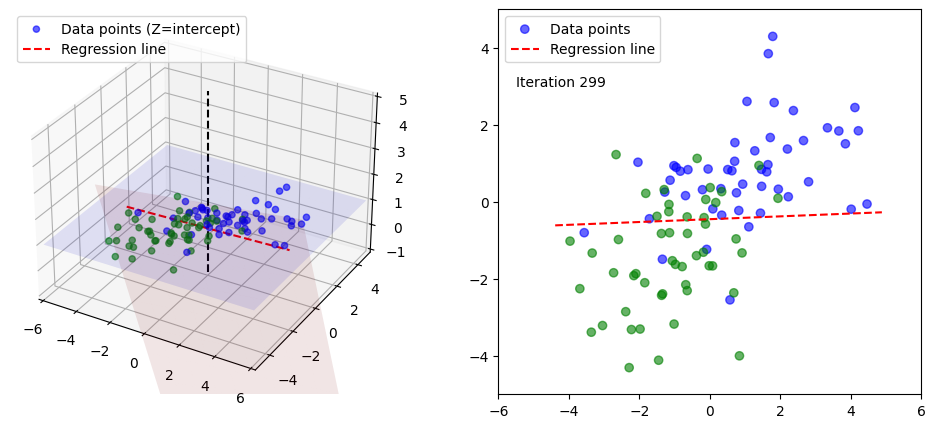

In [11]:
# Funciones auxiliares para graficar los planos
def axplane(ax, color='gray', alpha=0.5):
    # se definen los límites de la figura
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # se grafica el plano paralelo a XY
    x = np.linspace(xlim[0], xlim[1], 10)
    y = np.linspace(ylim[0], ylim[1], 10)
    x, y = np.meshgrid(x, y)
    ax.plot_surface(x, y, np.ones_like(x), color=color, alpha=alpha)

def pzplane(ax, wx, wy, b, color='gray', alpha=0.5):
    # se definen los límites de la figura
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()

    # se grafica la frontera de decisión
    x = np.linspace(xlim[0], xlim[1], 10)
    y = np.linspace(zlim[0], zlim[1], 10)
    X, Y = np.meshgrid(x, y)
    Z = (-wx*X - wy*Y ) / b
    ax.plot_surface(X, Y, Z, color=color, alpha=alpha)# Set up the figure and axis for the animation

# se crea la figura en 2D
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(122)
ax.set_xlim(-6, 6)
ax.set_ylim(-5, 5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Ajuste de regresión lineal")

# se crea la figura en 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_xlim(-6, 6)
ax1.set_ylim(-5, 5)
ax1.set_zlim(-1, 5)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z (Bias)')
ax1.set_title("Plano de decisión")

# se inicializan los diagramas de dispersión
scatter = ax.scatter([], [], color='blue', alpha=0.6, label='Data points')
scatter1 = ax1.scatter([], [], [], color='blue', alpha=0.6, label='Data points (Z=intercept)')

# se inicializan las rectas de decisión
line, = ax.plot([], [], color='red', label='Regression line')
line1, = ax1.plot([], [], [], color='red', label='Regression line')

#
ax.legend()
ax1.legend()

epochs = 3
eta = 0.005
wx = -0.4
wy = 0.3
b = 0.3

# fución para actualizar la figura en cada iteración
idx = np.random.permutation(range(NUM_POINTS*2))
def update(frame):
    global wx, wy, b, idx
    # actualizar los pesos mediante gradiente descendiente
    idx_point = idx[frame % len(x)]
    wx, wy, b = gradient_descent_step(np.append(x[idx_point], 1), y[idx_point], np.array([wx, wy, b], dtype=float), eta)

    # actualizar diagrama de dispersión en 2D
    ax.clear()
    colors = ["blue"]*NUM_POINTS + ["green"]*NUM_POINTS
    scatter = ax.scatter(*x.T, color=colors, alpha=0.6, label='Data points')
    # calcular la recta de decisión
    x_line = np.linspace(*ax.get_xlim(), 10).reshape(-1, 1)
    y_line = (-wx* x_line - b)/wy
    line, = ax.plot(x_line, y_line, '--r', label='Regression line')
    ax.legend(loc='upper left')
    ax.set_xlim(-6, 6)
    ax.set_ylim(-5, 5)


    # actualiza diagrama de dispersión en 3D
    ax1.clear()
    scatter1 = ax1.scatter(x[:,0], x[:,1], np.ones(x.shape[0]),
                           color=colors, alpha=0.6, label='Data points (Z=intercept)')

    # graficar recta de decisión en 3D
    line1, = ax1.plot(x_line, y_line, np.ones(len(x_line)).reshape(-1, 1),'--r', label='Regression line')

    ax1.legend(loc='upper left')
    ax1.set_xlim(-6, 6)
    ax1.set_ylim(-5, 5)
    ax1.set_zlim(-1, 5)

    # graficar plano Z=1
    axplane(ax1, color='blue', alpha=0.1)

    # graficar plano de frontera de decisión
    pzplane(ax1, wx, wy, b, color='red', alpha=0.1)

    # graficar eje z
    z_line = np.linspace(-1, 6, 10)
    ax1.plot(np.zeros_like(z_line), np.zeros_like(z_line), z_line, '--k', label='Z-Axis Line')

    # añadir iteración

    ax.text(-5.5, 3,f"Iteration {frame}")
    return scatter, line

frames = len(x) * epochs
ani = FuncAnimation(fig, update, frames=frames, blit=False, repeat=False)

# guardar animación como gif
ani.save("linear_regression.gif", writer=PillowWriter(fps=10))
plt.show()
